Actions
--
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3

State
--
Int from 0 to 69

Rewards
--
-1 for each move

In [1]:
from lib.envs.windy_gridworld import WindyGridworldEnv
from IPython.display import clear_output
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
env = WindyGridworldEnv()

In [3]:
# ENV Test code

env.reset()
for _ in range(100):
    clear_output(wait=True)
    env.render()
    print(env.step(random.choice(range(4)))) #
    time.sleep(.4)

o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o

(21, -1.0, False, {'prob': 1.0})


KeyboardInterrupt: 

# ON-POLICY TD(0)

In [13]:
def find_actions_for_state(state_action_values, state):
    res_d = {}
    visits = 0
    for k in state_action_values:
        if k[0] == state:
            res_d[k] = state_action_values[k]['value']
    return res_d

def find_max_val_action_for_state(state_action_values, state):
    res_d = find_actions_for_state(state_action_values, state)
    if res_d:
        return max(res_d, key=res_d.get)[1]
    else:
        return None

def run_episode(env, cur_state, cur_action, policy, state_actions_values, show=False):
    terminal = False
    trajectory = []
    while not terminal:
        new_state, reward, terminal, _ = env.step(cur_action)
        next_action = policy[new_state]

        # Now we have: (cur_state, cur_action, reward, new_state, next_action)
        trajectory.append((cur_state, cur_action, reward, new_state, next_action))
        print(len(trajectory))
        cur_state = new_state; cur_action = next_action
        if show:
            env.render()
            time.sleep(.3)
            clear_output(wait=True)
    
    return trajectory


    
def learn_episode(env, cur_state, cur_action, state_actions_values, policy, show=False):
    
    terminal = False
    trajectory = []
    while not terminal:
        
        new_state, reward, terminal, _ = env.step(cur_action)
        
        ###################################
        
        if np.random.uniform() < eps:
            next_action = find_max_val_action_for_state(state_actions_values, new_state)
            if not next_action: next_action = random.choice(range(4)) 
        else:
            next_action = random.choice(range(4))
        policy[new_state] = next_action
        ###################################

        # Now we have: (cur_state, cur_action, reward, new_state, next_action)
        trajectory.append((cur_state, cur_action, reward, new_state, next_action))


        if (cur_state, cur_action) in state_actions_values:
            val = state_actions_values[(cur_state, cur_action)]['value']
        else:
            state_actions_values[(cur_state, cur_action)] = {}
            val = 0

        if (new_state, next_action) not in state_actions_values:
            state_actions_values[(new_state, next_action)] = {}
            state_actions_values[(new_state, next_action)]['value'] = 0

        state_actions_values[(cur_state, cur_action)]['value'] = \
            val+alpha*(reward+lam*state_actions_values[(new_state, next_action)]['value'] - val)

        cur_state = new_state; cur_action = next_action
        if show:
            env.render()
            time.sleep(.99)
            clear_output(wait=True)
    
    return (trajectory, state_actions_values, policy)

In [9]:
state_actions_values = {}
policy = {}

In [10]:
eps = 0.9
alpha = 0.5
lam = 0.9
batch_size = 500

env = WindyGridworldEnv()


trajectories = []
for _ in range(batch_size):
    
    cur_state = env.reset()
    cur_action = random.choice(range(4))
    
    (trajectory, state_actions_values, policy) = \
        learn_episode(env, cur_state, cur_action, state_actions_values, policy, show=False)
    trajectories.append(trajectory)
    
    if _%500==0:
        print(_)

0


In [68]:
sm = 0
for t in trajectories:
    sm+=len(t)
sm

11716

(0.0, 150.0)

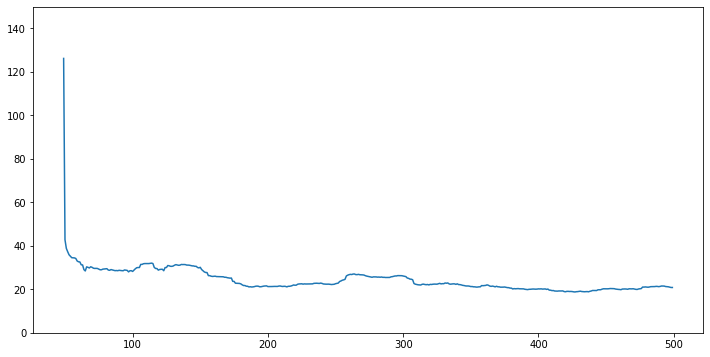

In [11]:
# PLOT TRAJECTORIES LENGTH
lens = []
for t in trajectories:#[:1500]:
    lens.append(len(t))
lens_df = pd.DataFrame(lens)
lens_df['mean_len'] = lens_df[0].rolling(50).mean()

plt.figure(figsize=(12,6))
plt.plot(lens_df['mean_len'])
plt.ylim(0,150)

In [ ]:
# POLICY DEMO
env = WindyGridworldEnv()

cur_state = env.reset()
cur_action = 1


for episode in range(300):
    
    new_episode = run_episode(env, cur_state, cur_action, policy, state_actions_values, show=True)
    print('SUCCESSS!!! '*100)
    cur_state = env.reset()
    cur_action = 1
    

8
o  o  o  o  o  o  o  o  x  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o



# OFF-POLICY TD(0)

In [70]:
def find_actions_for_state(state_action_values, state):
    res_d = {}
    visits = 0
    for k in state_action_values:
        if k[0] == state:
            res_d[k] = state_action_values[k]['value']
    return res_d

def find_max_val_action_for_state(state_action_values, state):
    res_d = find_actions_for_state(state_action_values, state)
    if res_d:
        return max(res_d, key=res_d.get)[1]
    else:
        return None

def run_episode(env, cur_state, cur_action, policy, state_actions_values, show=False):
    terminal = False
    trajectory = []
    while not terminal:
        new_state, reward, terminal, _ = env.step(cur_action)
        next_action = policy[new_state]

        # Now we have: (cur_state, cur_action, reward, new_state, next_action)
        trajectory.append((cur_state, cur_action, reward, new_state, next_action))
        print(len(trajectory))
        cur_state = new_state; cur_action = next_action
        if show:
            env.render()
            time.sleep(1)
            clear_output(wait=True)
    
    return trajectory


    
def learn_episode(env, cur_state, cur_action, state_actions_values, policy, show=False):
    
    terminal = False
    trajectory = []
    while not terminal:
        
        new_state, reward, terminal, _ = env.step(cur_action)
        
        ###################################
        best_action = find_max_val_action_for_state(state_actions_values, new_state)
        if not best_action: best_action = random.choice(range(4))  
        
        if np.random.uniform() < eps:
            next_action = best_action
#             if not next_action: next_action = random.choice(range(4)) 
        else:
            next_action = random.choice(range(4))
        policy[new_state] = next_action
        ###################################

        # Now we have: (cur_state, cur_action, reward, new_state, next_action)
        trajectory.append((cur_state, cur_action, reward, new_state, next_action))


        if (cur_state, cur_action) in state_actions_values:
            val = state_actions_values[(cur_state, cur_action)]['value']
        else:
            state_actions_values[(cur_state, cur_action)] = {}
            val = 0
            state_actions_values[(cur_state, cur_action)]['value'] = val

        if (new_state, best_action) not in state_actions_values:
            state_actions_values[(new_state, best_action)] = {}
            state_actions_values[(new_state, best_action)]['value'] = 0

        state_actions_values[(cur_state, cur_action)]['value'] = \
            val+alpha*(reward+lam*state_actions_values[(new_state, best_action)]['value'] - val)

        cur_state = new_state; cur_action = next_action
        if show:
            env.render()
            time.sleep(.99)
            clear_output(wait=True)
    
    return (trajectory, state_actions_values, policy)

In [90]:
state_actions_values = {}
policy = {}

In [91]:
eps = 0.97
alpha = 0.5
lam = 0.98
batch_size = 200

env = WindyGridworldEnv()


trajectories = []
for _ in range(batch_size):
    
    cur_state = env.reset()
    cur_action = random.choice(range(4))
    
    (trajectory, state_actions_values, policy) = \
        learn_episode(env, cur_state, cur_action, state_actions_values, policy, show=False)
    trajectories.append(trajectory)
    
    if _%500==0:
        print(_)

0


(0.0, 150.0)

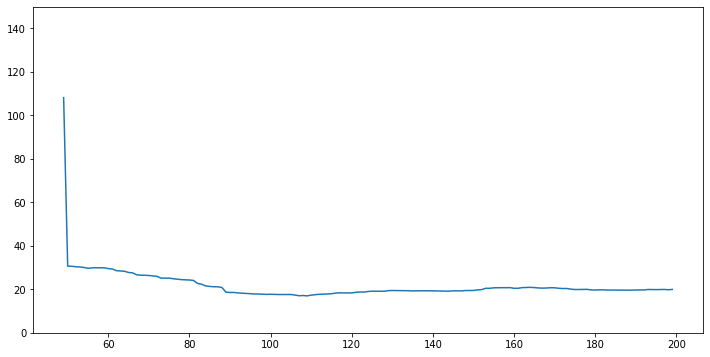

In [92]:
# PLOT TRAJECTORIES LENGTH
lens = []
for t in trajectories:#[:1500]:
    lens.append(len(t))
lens_df = pd.DataFrame(lens)
lens_df['mean_len'] = lens_df[0].rolling(50).mean()

plt.figure(figsize=(12,6))
plt.plot(lens_df['mean_len'])
plt.ylim(0,150)

In [93]:
# POLICY DEMO
env = WindyGridworldEnv()

cur_state = env.reset()
cur_action = 1


for episode in range(1):
    
    new_episode = run_episode(env, cur_state, cur_action, policy, state_actions_values, show=True)
    print('SUCCESSS!!! '*100)
    cur_state = env.reset()
    cur_action = 1
    

SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCCESSS!!! SUCC

# TEST

In [81]:
def find_max_val_action_for_state(state_action_values, state):
    res_d = {}
    for k in state_action_values:
        if k[0] == state:
            res_d[k] = state_action_values[k]['value']
    if res_d:
        return max(res_d, key=res_d.get)[1]
    else:
        return env.action_space.sample()


def select_greedy_action(state, state_action_values, eps):
    if np.random.uniform() < eps:
        next_action = find_max_val_action_for_state(state_action_values, state)
    else:
        next_action = env.action_space.sample()
    
    return next_action

def update_state_action_values(state_action_values, 
                               cur_state, 
                               cur_action, 
                               reward, 
                               next_state, 
                               best_action):
    local_cp = state_action_values.copy()
    
    
    if (cur_state, cur_action) in local_cp:
        val = local_cp[(cur_state, cur_action)]['value']
    else:
        local_cp[(cur_state, cur_action)] = {}
        val = 0
        local_cp[(cur_state, cur_action)]['value'] = val

    if (next_state, best_action) not in local_cp:
        local_cp[(next_state, best_action)] = {}
        local_cp[(next_state, best_action)]['value'] = 0

    local_cp[(cur_state, cur_action)]['value'] = \
        val+alpha*(reward+lam*local_cp[(next_state, best_action)]['value'] - val)
    
    
    return local_cp

def run_episode(env, cur_state, cur_action, policy, state_action_values, show=False):
    done = False
    trajectory = []
    while not done:
        next_state, reward, done, info = env.step(cur_action)
        if next_state in policy:
            print(f'{next_state} IN POLICY '*10)
            next_action = policy[next_state]
        else:
            print(f'{next_state} NOT IN POLICY '*10)
            next_action = select_greedy_action(next_state, state_action_values, eps)

        # Now we have: (cur_state, cur_action, reward, new_state, next_action)
        trajectory.append((cur_state, cur_action, reward, next_state, next_action))
        print(len(trajectory))
        cur_state = next_state; cur_action = next_action
        if show:
            env.render()
            time.sleep(.5)
            clear_output(wait=True)
    
    return trajectory

def learn_episode(cur_state, cur_action, state_action_values, policy, show=False):
    
    local_state_action_values = state_action_values.copy()
    local_policy = policy.copy()
    
    ep_sum_reward = 0
    trajectory=[]
    done = False
    while not done:

        next_state, reward, done, info = env.step(cur_action); ep_sum_reward+=reward
        
#         world_map[(cur_state, cur_action)] = (next_state, reward)
        
        next_action =  select_greedy_action(next_state, local_state_action_values, eps)

        
        best_action = find_max_val_action_for_state(local_state_action_values, next_state)
#         if np.random.uniform() < eps:
#             next_action = best_action
#         else:
#             next_action = env.action_space.sample()
    
        local_policy[next_state] = best_action
        trajectory.append((cur_state, cur_action, reward, next_state))
        
        local_state_action_values = \
            update_state_action_values(local_state_action_values, cur_state, cur_action, reward, 
                                       next_state, best_action)
        cur_state = next_state; cur_action = next_action
        


        if show:
            env.render()
            clear_output(wait=True)
            time.sleep(.3)
    
    return (trajectory, local_state_action_values, local_policy, ep_sum_reward)

In [83]:
eps = 0.97
alpha = 0.5
lam = 0.98

world_map = {}
state_action_values = {}
policy = {}

env = WindyGridworldEnv()
cur_state = env.reset()
cur_action =  env.action_space.sample()  

episodes = 200
ep_sums = []
trajectories = []
for ep_num in range(episodes):
    
    (trajectory, state_action_values, policy, ep_sum_reward) = \
        learn_episode(cur_state, 
                      cur_action,
                      state_action_values, 
                      policy, 
                      show=False)
    
    trajectories.append(trajectory)
    ep_sums.append(ep_sum_reward)
    if ep_num%10==0:
        print(f'{ep_num}:', ep_sum_reward, len(trajectory))
        print('#'*30)

0: -5218.0 5218
##############################
10: -12.0 12
##############################
20: -12.0 12
##############################
30: -12.0 12
##############################
40: -12.0 12
##############################
50: -12.0 12
##############################
60: -12.0 12
##############################
70: -12.0 12
##############################
80: -9.0 9
##############################
90: -9.0 9
##############################
100: -9.0 9
##############################
110: -9.0 9
##############################
120: -10.0 10
##############################
130: -9.0 9
##############################
140: -9.0 9
##############################
150: -10.0 10
##############################
160: -9.0 9
##############################
170: -9.0 9
##############################
180: -9.0 9
##############################
190: -9.0 9
##############################


In [86]:
# POLICY DEMO
num_eps = 500
env = WindyGridworldEnv()
cur_state = env.reset()
cur_action = policy[cur_state]

for eps in range(num_eps):
    new_episode = run_episode(env, cur_state, cur_action, policy, state_action_values, show=True)
    print('SUCCESSS!!! '*100)
    start_state = env.reset()

7 IN POLICY 7 IN POLICY 7 IN POLICY 7 IN POLICY 7 IN POLICY 7 IN POLICY 7 IN POLICY 7 IN POLICY 7 IN POLICY 7 IN POLICY 
9
o  o  o  o  o  o  o  x  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o



KeyboardInterrupt: 

(0.0, 50.0)

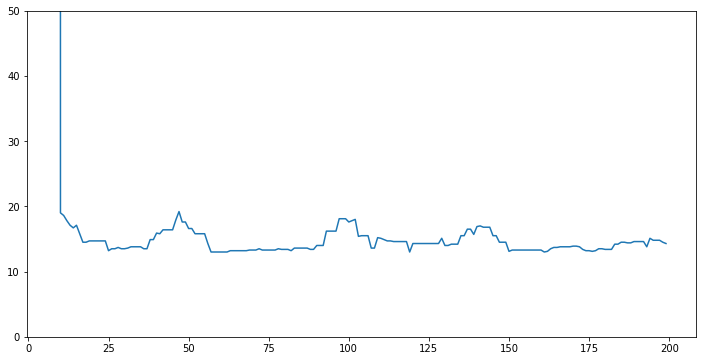

In [80]:
# PLOT TRAJECTORIES LENGTH
lens = []
for t in trajectories:#[:1500]:
    lens.append(len(t))
lens_df = pd.DataFrame(lens)
lens_df['mean_len'] = lens_df[0].rolling(10).mean()

plt.figure(figsize=(12,6))
plt.plot(lens_df['mean_len'])
plt.ylim(0,50)